In [80]:
import random

import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

# to play the audio files
from IPython.display import Audio
from pydub import AudioSegment
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
import openpyxl
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow

In [81]:
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [82]:
# Location of the dataset
# Path for Ravdess dataset
ravdess = "unsplittedDatasets/datasets/RavdevsLow"
# Path for Savee dataset
savee = "unsplittedDatasets/datasets/Savee"
# Path for Tess dataset
tess = "unsplittedDatasets/datasets/TESS"
# Path for CREMA-D dataset
cremaD = "unsplittedDatasets/datasets/CremaD"
# Path for EVOV-DB
emoDB = "unsplitted datasets/datasets/EMOV-DB"
# Path for JL
jl = "datasets/JL"
# Path for JL2
jl2 = "datasets/JL2"
# Path for IEMOCAP
iemocap = "datasets/IEMOCAP"
# Path for ML-END
mlEnd = "datasets/MLEnd"

In [83]:
def categorizeEmotion(emote):
    if emote == "neu":
        emote = "neutral"
    elif emote == "fru" or emote == "ang":
        emote = "angry"
    elif emote == "exc" or emote == "hap":
        emote = "happy"
    elif emote == "sur":
        emote = "surprise"
    elif emote == "dis":
        emote = "disgust"
    elif emote == "fea":
        emote = "fear"
    return emote

THis is for Iemocap. USE later

In [84]:
# file_emotion = []
# file_path = []
# iemocap_directory_list = os.listdir(iemocap)
#
# iemocap_data_from_excel = pd.read_excel("iemocap.xlsx")
# fileAndEmotion = {}
# for filename, fileEmotion in zip(iemocap_data_from_excel["id"], iemocap_data_from_excel["emotion"]):
#     fileEmotion = categorizeEmotion(fileEmotion)
#     fileAndEmotion[filename]=fileEmotion
# for file in iemocap_directory_list:
#     file = file.split(".")[0]
#     for keys in fileAndEmotion:
#         if file == keys and fileAndEmotion[keys]!= "xxx" and fileAndEmotion[keys]!="oth":
#             file_emotion.append(fileAndEmotion[keys])
#             file_path.append(iemocap+"/"+file+".wav")
# emocount = {}
# for emo in file_emotion:
#     if emo in emocount:
#         emocount[emo]+=1
#     else:
#         emocount[emo]=1
# print(emocount)
#
# file_path_df = pd.DataFrame(file_path,columns=["Path"])
# file_emotion_df = pd.DataFrame(file_emotion,columns=["Emotions"])
# iemocap_df = pd.concat([file_emotion_df,file_path_df],axis=1)
# print(iemocap_df.shape)
# iemocap_df.head()

FOR JL, use it later

In [85]:
# jl_directory_list = os.listdir(jl)
# file_emotion = []
# file_path = []
# emotionList = ["happy", "neutral", "sad", "angry", "fear", "disgust", "surprise"]
#
# for file in jl_directory_list:
#     emotionName = file.split("_")[1]
#     if emotionName == "anxious" or emotionName == "concerned":
#         emotionName = "fear"
#     elif emotionName == "apologetic":
#         emotionName = "sad"
#     elif emotionName == "excited":
#         emotionName = "happy"
#     for item in emotionList:
#         if emotionName == item:
#             file_emotion.append(emotionName)
#             file_path.append(jl + "/" + file)
# emotion_df = pd.DataFrame(file_emotion, columns=["Emotions"])
# path_df = pd.DataFrame(file_path, columns=["Path"])
# jl_df = pd.concat([emotion_df, path_df], axis=1)
# emotions = {}
# for emo in jl_df["Emotions"]:
#     if emo in emotions:
#         emotions[emo] += 1
#     else:
#         emotions[emo] = 1
# print(emotions)
# print(jl_df.shape)
# jl_df.head()

FOR JL2, use it later

In [86]:
# jl2_directory_list = os.listdir(jl2)
# file_emotion = []
# file_path = []
# emotionList = ["happy", "neutral", "sad", "angry", "fear", "disgust", "surprise"]
# for folder in jl2_directory_list:
#     subfolder = jl2 + "/" + folder
#     surveyList = os.listdir(subfolder)
#     for survey in surveyList:
#         pages = subfolder + "/" + survey
#         pageList = os.listdir(pages)
#         for page in pageList:
#             files = pages + "/" + page
#             fileList = os.listdir(files)
#             for file in fileList:
#                 if file == "cleaned":
#                     continue
#                 elif file.startswith("Select"):
#                     emotionName = file.split("_")[2]
#                 else:
#                     emotionName = file.split("_")[1]
#                 if emotionName == "anxious" or emotionName == "concerned":
#                     emotionName = "fear"
#                 elif emotionName == "apologetic":
#                     emotionName = "sad"
#                 elif emotionName == "excited":
#                     emotionName = "happy"
#                 for item in emotionList:
#                     if emotionName == item:
#                         file_emotion.append(emotionName)
#                         file_path.append(files + "/" + file)
# file_path.__len__()
# emotion_df = pd.DataFrame(file_emotion, columns=["Emotions"])
# path_df = pd.DataFrame(file_path, columns=["Path"])
# jl2_df = pd.concat([emotion_df, path_df], axis=1)
# emotions= {}
# for emo in jl_df["Emotions"]:
#     if emo in emotions:
#         emotions[emo] += 1
#     else:
#         emotions[emo] = 1
# print(jl2_df.shape)
# jl2_df.head()

For EMO-DB, Use it later

In [87]:
# emoDb_directory_list = os.listdir(emoDB)
# file_emotion = []
# file_path = []
#
# for dir in emoDb_directory_list:
#     parentFolder = emoDB + "/" + dir
#     actorsList = os.listdir(parentFolder)
#     for folders in actorsList:
#         childFolder = parentFolder + "/" + folders
#         files = os.listdir(childFolder)
#         for item in files:
#             part = item.split("_")
#             if part[0].lower() == "anger":
#                 file_emotion.append("angry")
#             elif part[0].lower() == "amused":
#                 file_emotion.append("surprise")
#             else:
#                 file_emotion.append(part[0].lower())
#             # file_emotion.append(part[0])
#             file_path.append(childFolder + "/" + item)
#
# emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# path_df = pd.DataFrame(file_path, columns=['Path'])
# emoDB_df = pd.concat([emotion_df, path_df], axis=1)
# # emoDB_df.to_excel("emo.xlsx",index=0)
# print(emoDB_df.shape)
# emoDB_df.head()


In [88]:
ravdess_directory_list = os.listdir(ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(ravdess + "/" + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + "/" + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# Happy and surprise merged, 8 was initially surprise
#
# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1: 'neutral', 2: 'neutral', 3: 'happy', 4: 'sad',
                             5: 'angry', 6: 'fear', 7: 'disgust', 8: 'happy'}, inplace=True)
Ravdess_df.head()
print(Ravdess_df.shape)

(1440, 2)


In [89]:
crema_directory_list = os.listdir(cremaD)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(cremaD + "/" + file)
    # storing file emotions
    part = file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()


,Emotions,Path
0,angry,unsplittedDatasets/datasets/CremaD/1001_DFA_AN...
1,disgust,unsplittedDatasets/datasets/CremaD/1001_DFA_DI...
2,fear,unsplittedDatasets/datasets/CremaD/1001_DFA_FE...
3,happy,unsplittedDatasets/datasets/CremaD/1001_DFA_HA...
4,neutral,unsplittedDatasets/datasets/CremaD/1001_DFA_NE...


In [90]:
tess_directory_list = os.listdir(tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(tess + "/" + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part == 'ps':
            continue
            # file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(tess + "/" + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
print(Tess_df.shape)
Tess_df.head()


(2400, 2)


,Emotions,Path
0,angry,unsplittedDatasets/datasets/TESS/OAF_angry/OAF...
1,angry,unsplittedDatasets/datasets/TESS/OAF_angry/OAF...
2,angry,unsplittedDatasets/datasets/TESS/OAF_angry/OAF...
3,angry,unsplittedDatasets/datasets/TESS/OAF_angry/OAF...
4,angry,unsplittedDatasets/datasets/TESS/OAF_angry/OAF...


In [91]:
savee_directory_list = os.listdir(savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    part = file.split('_')[1]
    ele = part[:-6]
    if ele == 'a':
        file_path.append(savee + "/" + file)
        file_emotion.append('angry')
    elif ele == 'd':
        file_path.append(savee + "/" + file)
        file_emotion.append('disgust')
    elif ele == 'f':
        file_path.append(savee + "/" + file)
        file_emotion.append('fear')
    elif ele == 'h':
        file_path.append(savee + "/" + file)
        file_emotion.append('happy')
    elif ele == 'n':
        file_path.append(savee + "/" + file)
        file_emotion.append('neutral')
    elif ele == 'sa':
        file_path.append(savee + "/" + file)
        file_emotion.append('sad')
    else:
        continue
        # file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
print(Savee_df.shape)
Savee_df.head()

(420, 2)


,Emotions,Path
0,angry,unsplittedDatasets/datasets/Savee/DC_a01.wav
1,angry,unsplittedDatasets/datasets/Savee/DC_a02.wav
2,angry,unsplittedDatasets/datasets/Savee/DC_a03.wav
3,angry,unsplittedDatasets/datasets/Savee/DC_a04.wav
4,angry,unsplittedDatasets/datasets/Savee/DC_a05.wav


In [92]:
# data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df,emoDB_df, jl_df, jl2_df, iemocap_df], axis = 0)
# data_path = pd.concat([Crema_df, Tess_df, Savee_df], axis=0)
# data_path = pd.concat([Savee_df], axis=0)
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)
data_path.to_csv("data_path_4DS.csv", index=False)
data_path.head()

,Emotions,Path
0,neutral,unsplittedDatasets/datasets/RavdevsLow/Actor_0...
1,neutral,unsplittedDatasets/datasets/RavdevsLow/Actor_0...
2,neutral,unsplittedDatasets/datasets/RavdevsLow/Actor_0...
3,neutral,unsplittedDatasets/datasets/RavdevsLow/Actor_0...
4,neutral,unsplittedDatasets/datasets/RavdevsLow/Actor_0...


In [93]:
emotionList = pd.read_csv("data_path_4DS.csv")
emotions = emotionList["Emotions"]
emotionCount = {}
for item in emotions:
    if item in emotionCount:
        emotionCount[item] += 1
    else:
        emotionCount[item] = 1
emotionCount = dict(sorted(emotionCount.items(), key=lambda x: x[0]))
print(emotionCount)

{'angry': 1923, 'disgust': 1923, 'fear': 1923, 'happy': 2115, 'neutral': 1895, 'sad': 1923}


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']

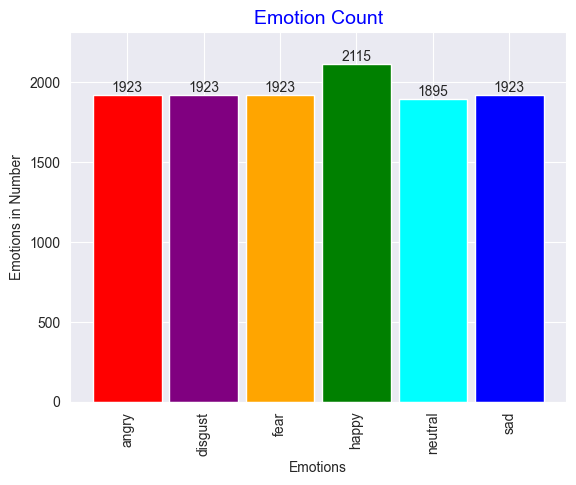

In [94]:
plt.bar(emotionCount.keys(), emotionCount.values(), width=0.9, align="center",
        color=["red", "purple", "orange", "green", "cyan", "blue", "yellow"])
plt.xlabel("Emotions")
plt.xticks(rotation=90)
plt.ylabel("Emotions in Number")
plt.title("Emotion Count", size=14, color="Blue")
plt.ylim([0, max(emotionCount.values()) + 200])
lst = []
for item in emotionCount:
    plt.text(item, emotionCount[item],
             emotionCount[item], ha="center", va="bottom")
sorted(emotionCount)


In [95]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()


def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    # librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()


In [96]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data


def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)


def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)


def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


def volumeAdd(data):
    songData = AudioSegment.from_wav(data)
    print("sing", songData)
    songDataSamples = np.array(songData.get_array_of_samples())
    songHighVolumed = songDataSamples - 10000.0
    print(songHighVolumed)
    return songHighVolumed


unsplittedDatasets/datasets/RavdevsLow/Actor_01/03-01-01-01-01-02-01.wav


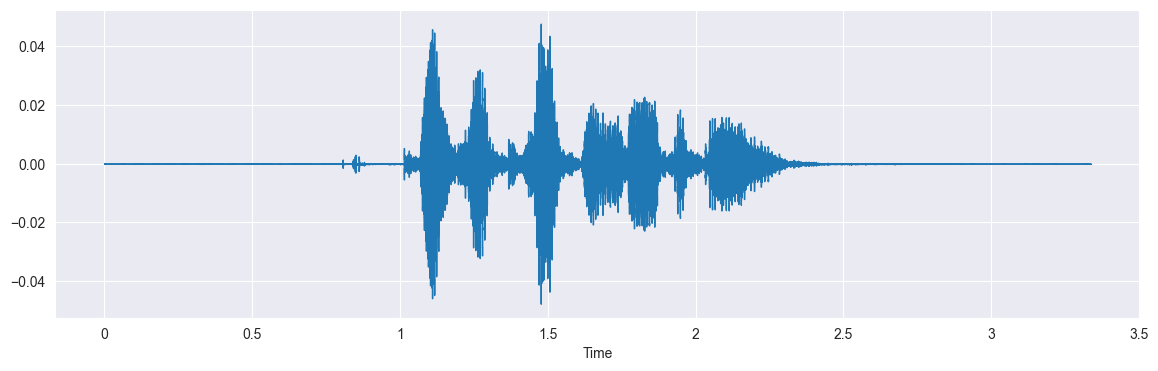

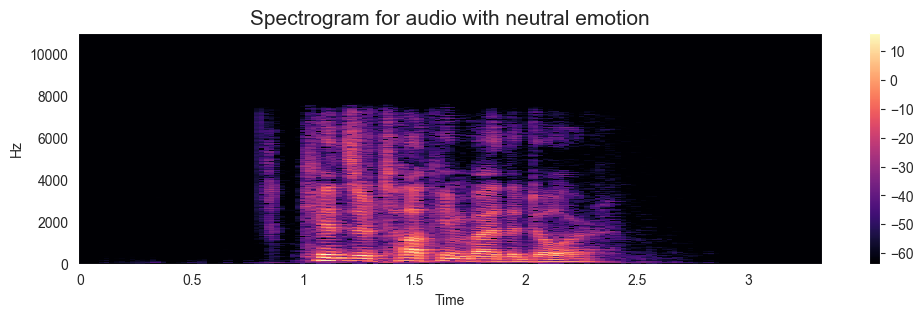

In [97]:
# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
print(path)
data, sample_rate = librosa.load(path)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)
create_spectrogram(data, sample_rate, np.array(data_path.Emotions)[1])

In [98]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))  # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(
        S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))  # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))  # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))  # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(
        y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))  # stacking horizontally

    return result


def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))  # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3))  # stacking vertically

    return result


In [99]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    try:
        feature = get_features(path)
    except:
        print(path)
        print(emotion)
    for ele in feature:
        try:
            X.append(ele)
            # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
            Y.append(emotion)
        except:
            print(ele)

In [100]:
len(X), len(Y), data_path.Path.shape

(35106, 35106, (11702,))

In [101]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_excel('features_RTCS.xlsx', index=False)
Features.head()


,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.224306,0.664190,0.693038,0.665390,0.673116,0.696442,0.684787,0.706183,0.748844,0.782297,...,6.888786e-17,6.993841e-17,7.601734e-17,7.305700e-17,6.833248e-17,7.254374e-17,7.962738e-17,7.395194e-17,7.358765e-17,neutral
1,0.331706,0.788573,0.840757,0.824252,0.814504,0.825836,0.751615,0.682092,0.727096,0.755655,...,1.079049e-04,1.066894e-04,1.041879e-04,1.035557e-04,9.789473e-05,9.803459e-05,1.002429e-04,1.005239e-04,1.046561e-04,neutral
2,0.169383,0.579495,0.662042,0.674849,0.631609,0.623019,0.687452,0.671907,0.692694,0.712601,...,1.885160e-15,1.743947e-15,1.590055e-15,1.477827e-15,1.528373e-15,1.689925e-15,1.679742e-15,1.602365e-15,1.500745e-15,neutral
3,0.196533,0.652948,0.692924,0.664361,0.648762,0.686783,0.688136,0.683010,0.735986,0.759067,...,7.385022e-17,6.953342e-17,7.445123e-17,7.997667e-17,7.754531e-17,8.110750e-17,7.647288e-17,7.359221e-17,7.287652e-17,neutral
4,0.321886,0.758674,0.806946,0.824927,0.791100,0.785268,0.777324,0.666061,0.678802,0.716456,...,8.972317e-05,9.595653e-05,9.240668e-05,8.849074e-05,9.021119e-05,9.274923e-05,8.209951e-05,8.636674e-05,9.060095e-05,neutral


In [102]:
X = Features.iloc[:, :-1].values
Y = Features['labels'].values
# y_labels = Y

In [103]:
features_df = pd.read_excel("features_RTCS.xlsx")

In [104]:
featuresofit = np.asarray(features_df.iloc[:, :-1].values)
X = featuresofit
labelofit = np.asarray(features_df['labels'])
Y = labelofit

In [105]:
emotionsfromFeatures = features_df['labels']
emotionCountfromFeatures = {}
for item in emotionsfromFeatures:
    if item in emotionCountfromFeatures:
        emotionCountfromFeatures[item] += 1
    else:
        emotionCountfromFeatures[item] = 1
print(emotionCountfromFeatures)

{'neutral': 5685, 'happy': 6345, 'sad': 5769, 'angry': 5769, 'fear': 5769, 'disgust': 5769}


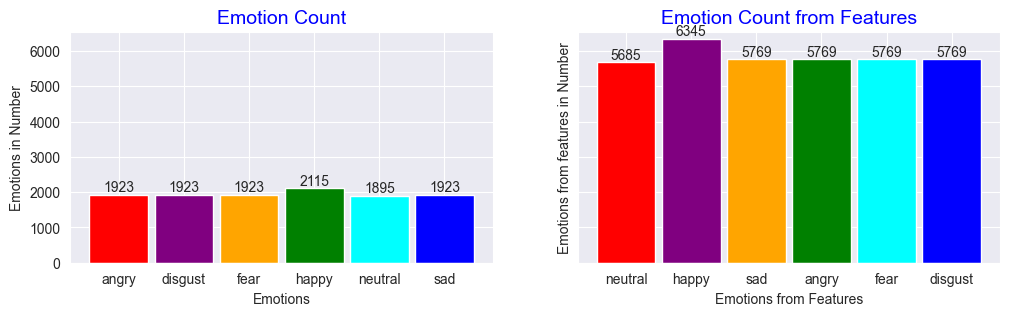

In [106]:
fig, (plt1, plt2) = plt.subplots(1, 2, sharey=True, figsize=(12, 3))
plt1.bar(emotionCount.keys(), emotionCount.values(), width=0.9, align="center",
         color=["red", "purple", "orange", "green", "cyan", "blue", "yellow"])
plt1.set_xlabel("Emotions")
plt1.set_ylabel("Emotions in Number")
plt1.set_title("Emotion Count", size=14, color="Blue")
plt1.set_ylim([0, max(emotionCount.values()) + 200])
# lst = []
for item in emotionCount:
    plt1.text(item, emotionCount[item],
              emotionCount[item], ha="center", va="bottom")

plt2.bar(emotionCountfromFeatures.keys(), emotionCountfromFeatures.values(), width=0.9, align="center",
         color=["red", "purple", "orange", "green", "cyan", "blue", "yellow"])
plt2.set_xlabel("Emotions from Features")
plt2.set_ylabel("Emotions from features in Number")
plt2.set_title("Emotion Count from Features", size=14, color="Blue")
plt2.set_ylim([0, max(emotionCountfromFeatures.values()) + 200])
# lst = []
for item in emotionCountfromFeatures:
    plt2.text(item, emotionCountfromFeatures[item],
              emotionCountfromFeatures[item], ha="center", va="bottom")
# plt2.subplots(nrows=1,ncols=2)

In [107]:
# print(Y)
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, random_state=0, test_size=0.1, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# pd.DataFrame(Y)

((31595, 162), (31595,), (3511, 162), (3511,))

In [108]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((31595, 162), (31595,), (3511, 162), (3511,))

In [109]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# x_train = pca.fit_transform(x_train)
# x_test = pca.fit_transform(x_test)

In [110]:
# C_choice = [150,200,250,300,350]
# C_choice = [0.5, 0.6, 0.8, 0.9, 1]


In [111]:
from sklearn import svm
from sklearn.metrics import accuracy_score

classifier = svm.SVC(kernel='linear', gamma="auto", C=1)
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)
accuracyPercent = accuracy_score(y_test, y_predict) * 100
print("Kernel:  " + "linear" + "  ||  " + " C: " + str(1) + "  ||  Accuracy" + "  :  " + str(accuracyPercent))

Kernel:  linear  ||   C: 1  ||  Accuracy  :  51.35289091426943


Confusion matrix, without normalization


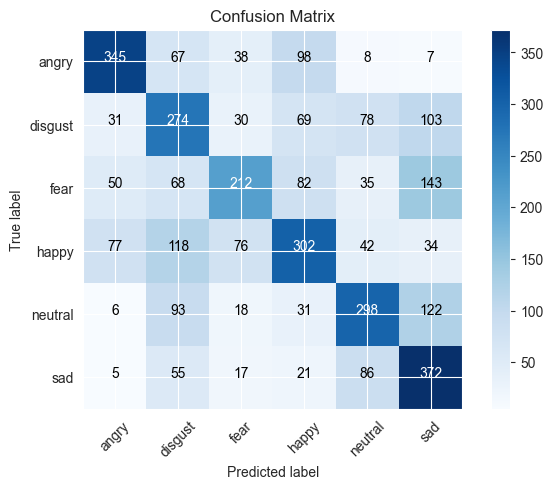

In [112]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

confusion = confusion_matrix(y_test, y_predict)
# df_confusion = pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

plot_confusion_matrix(confusion, classes=["angry", "disgust", "fear", "happy", "neutral", "sad"],
                      title='Confusion Matrix')
plt.show()


In [113]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       angry       0.67      0.61      0.64       563
     disgust       0.41      0.47      0.43       585
        fear       0.54      0.36      0.43       590
       happy       0.50      0.47      0.48       649
     neutral       0.54      0.52      0.53       568
         sad       0.48      0.67      0.56       556

    accuracy                           0.51      3511
   macro avg       0.52      0.52      0.51      3511
weighted avg       0.52      0.51      0.51      3511



In [114]:
import joblib
joblib.dump(classifier,"audio_svm_model_4DS.joblib")

['audio_svm_model_4DS.joblib']

In [115]:
from joblib import dump
dump(scaler, 'scaler.joblib')

['scaler.joblib']